In [1]:
import os

ROOT = os.path.dirname(os.path.dirname(os.path.abspath("__file__")))  # repo root

In [2]:
ROOT

'/home/user/abin_ref_papers/project_structure_demo/dnn_template'

In [4]:
# load the results

import pandas as pd

df_0_1 = pd.read_csv(os.path.join(ROOT, "results", "resnet_reslt_entropyselect_0_1_entro_diff_0.6.csv"))
df_0_02 = pd.read_csv(os.path.join(ROOT, "results", "resnet_reslt_entropyselect_0_02_entro_diff_0.6.csv"))
df_0_01 = pd.read_csv(os.path.join(ROOT, "results", "resnet_reslt_entropyselect_0_01_entro_diff_0.6.csv"))

In [6]:
df_0_1

,model,overall,head,medium,tail,class_0,class_1,class_2,class_3,class_4,class_5,class_6,class_7,class_8,class_9
0,Model1,0.8705,0.9555,0.8090,0.862667,0.940,0.971,0.830,0.788,0.896,0.785,0.891,0.861,0.876,0.867
1,Model2,0.8825,0.8935,0.8140,0.901667,0.847,0.940,0.856,0.772,0.926,0.872,0.909,0.888,0.922,0.893
2,Ensemble,0.8953,0.9325,0.8315,0.904167,0.907,0.958,0.870,0.793,0.929,0.859,0.922,0.895,0.923,0.897


In [7]:
df_0_02

,model,overall,head,medium,tail,class_0,class_1,class_2,class_3,class_4,class_5,class_6,class_7,class_8,class_9
0,Model1,0.7734,0.954,0.7905,0.707500,0.922,0.986,0.822,0.759,0.841,0.719,0.802,0.652,0.654,0.577
1,Model2,0.8106,0.856,0.7815,0.805167,0.785,0.927,0.827,0.736,0.861,0.751,0.845,0.755,0.829,0.790
2,Ensemble,0.8229,0.907,0.7955,0.804000,0.857,0.957,0.835,0.756,0.876,0.762,0.854,0.755,0.817,0.760


In [8]:
df_0_01

,model,overall,head,medium,tail,class_0,class_1,class_2,class_3,class_4,class_5,class_6,class_7,class_8,class_9
0,Model1,0.7211,0.9555,0.7855,0.621500,0.933,0.978,0.821,0.750,0.823,0.641,0.698,0.544,0.546,0.477
1,Model2,0.7648,0.8985,0.7815,0.714667,0.856,0.941,0.794,0.769,0.862,0.681,0.756,0.670,0.674,0.645
2,Ensemble,0.7727,0.9375,0.7970,0.709667,0.904,0.971,0.810,0.784,0.872,0.693,0.761,0.660,0.651,0.621


In [10]:
77.27 - 76.48

0.789999999999992

In [16]:
import pandas as pd

# Data
data = {
    "Imbalance Factor": [0.1, 0.1, 0.02, 0.02, 0.01, 0.01],
    "Model": ["ResNet basic", "ResLT", "ResNet basic", "ResLT", "ResNet basic", "ResLT"],
    "Overall (%)": [87.05, 88.25, 77.34, 81.06, 72.11, 76.48],
    "Head (%)": [95.55, 88.10, 95.40, 84.63, 95.55, 86.37],
    "Medium (%)": [80.90, 85.67, 79.05, 78.27, 78.55, 77.07],
    "Tail (%)": [86.27, 90.30, 70.75, 80.47, 62.15, 68.62],
}

# Create DataFrame
df = pd.DataFrame(data)

# Display
df


,Imbalance Factor,Model,Overall (%),Head (%),Medium (%),Tail (%)
0,0.10,ResNet basic,87.05,95.55,80.90,86.27
1,0.10,ResLT,88.25,88.10,85.67,90.30
2,0.02,ResNet basic,77.34,95.40,79.05,70.75
3,0.02,ResLT,81.06,84.63,78.27,80.47
4,0.01,ResNet basic,72.11,95.55,78.55,62.15
5,0.01,ResLT,76.48,86.37,77.07,68.62


In [17]:
# best accuracy that can be achieved from current model
for_0_1 = (95.55+ 85.67+ 90.30 )/3
for_0_02 = (95.40+ 78.25 + 80.47)/3
for_0_01 = (95.55 + 77.07 + 68.63)/3

print("Best accuracy that can be achieved for 0.01 with the current model:", for_0_01)
print("Best accuracy that can be achieved for 0.02 with the current model:", for_0_02)
print("Best accuracy that can be achieved for 0.1 with the current model:", for_0_1)

Best accuracy that can be achieved for 0.01 with the current model: 80.41666666666667
Best accuracy that can be achieved for 0.02 with the current model: 84.70666666666666
Best accuracy that can be achieved for 0.1 with the current model: 90.50666666666666


# Entropy absolute difference v/s ensemble accuracy

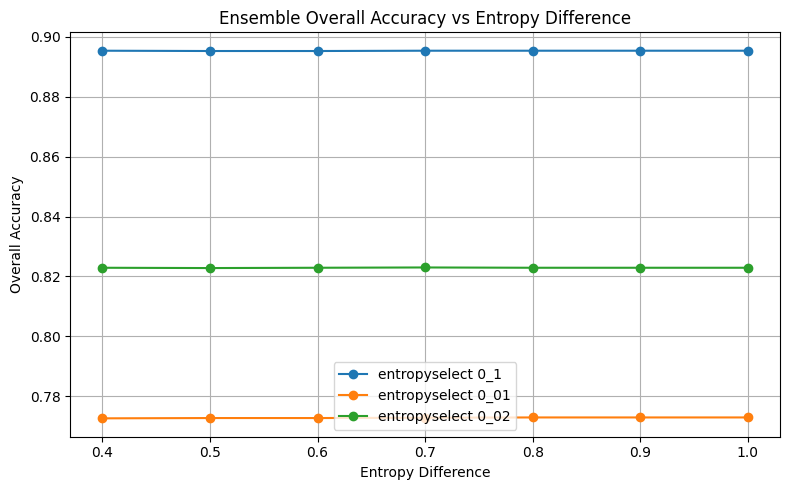

✅ Plot saved to: ../results/ensemble_accuracy_vs_entropy.png
✅ Summary CSV saved to: ../results/ensemble_accuracy_summary.csv


In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Path to results folder
results_folder = "../results"

# Entropy differences to check
entropy_diffs = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Different prefixes to compare
prefixes = {
    "0_1":  "resnet_reslt_entropyselect_0_1_entro_diff_",
    "0_01": "resnet_reslt_entropyselect_0_01_entro_diff_",
    "0_02": "resnet_reslt_entropyselect_0_02_entro_diff_"
}

results = {}

# Loop through each prefix and load accuracies
for label, prefix in prefixes.items():
    overall_acc = []
    for diff in entropy_diffs:
        file_name = f"{prefix}{diff}.csv"
        file_path = os.path.join(results_folder, file_name)

        if os.path.exists(file_path):
            
            df = pd.read_csv(file_path)
            ensemble_acc = df.loc[df['model'] == "Ensemble", "overall"].values[0]
            overall_acc.append(ensemble_acc)
        else:
            print("couldn't find the path", file_path, '\n')
            overall_acc.append(None)
    results[label] = overall_acc

# Plot
plt.figure(figsize=(8, 5))
for label, accs in results.items():
    plt.plot(entropy_diffs, accs, marker="o", linestyle="-", label=f"entropyselect {label}")

plt.title("Ensemble Overall Accuracy vs Entropy Difference")
plt.xlabel("Entropy Difference")
plt.ylabel("Overall Accuracy")
plt.grid(True)
plt.legend()
plt.tight_layout()

# Save the plot
plot_path = os.path.join(results_folder, "ensemble_accuracy_vs_entropy.png")
plt.savefig(plot_path, dpi=300)
plt.show()

# Save summary CSV
summary_df = pd.DataFrame({"entropy_diff": entropy_diffs})
for label, accs in results.items():
    summary_df[f"overall_acc_{label}"] = accs

csv_path = os.path.join(results_folder, "ensemble_accuracy_summary.csv")
summary_df.to_csv(csv_path, index=False)

print(f"✅ Plot saved to: {plot_path}")
print(f"✅ Summary CSV saved to: {csv_path}")


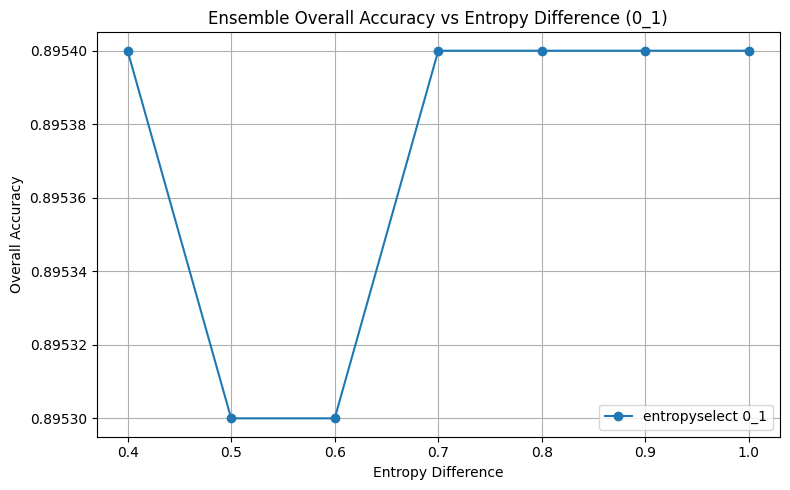

✅ Saved plot for 0_1 to ../results/ensemble_accuracy_vs_entropy_0_1.png


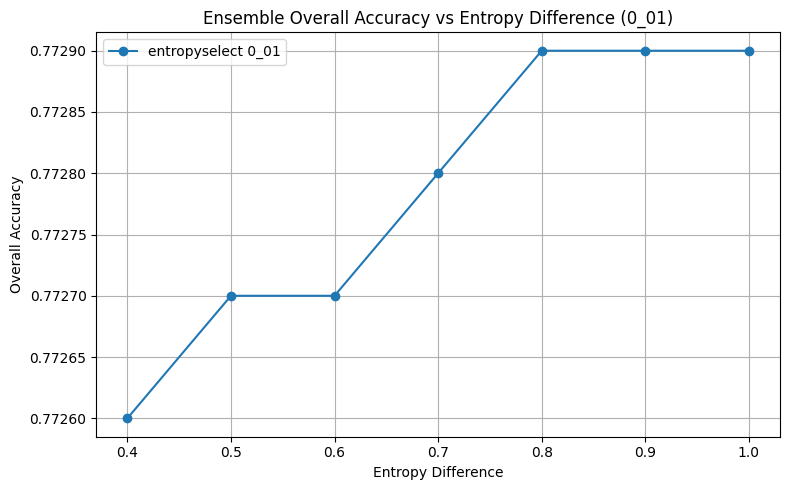

✅ Saved plot for 0_01 to ../results/ensemble_accuracy_vs_entropy_0_01.png


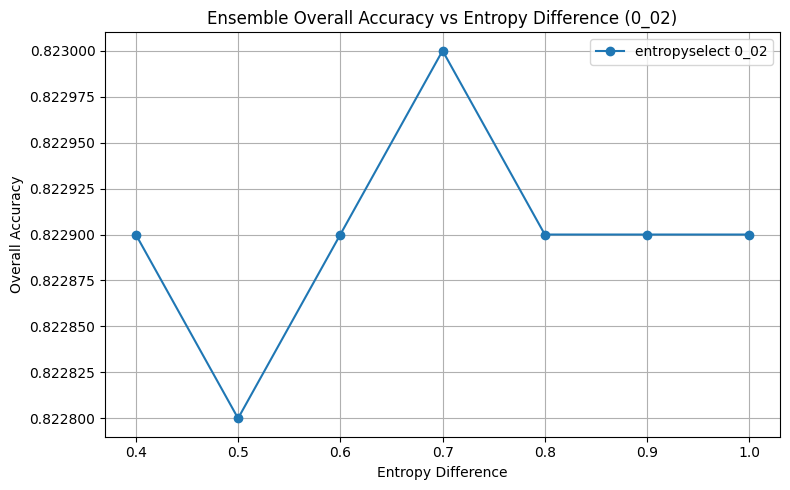

✅ Saved plot for 0_02 to ../results/ensemble_accuracy_vs_entropy_0_02.png
✅ Summary CSV saved to: ../results/ensemble_accuracy_summary.csv


In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Path to results folder
results_folder = "../results"

# Entropy differences to check
entropy_diffs = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Different prefixes to compare
prefixes = {
    "0_1":  "resnet_reslt_entropyselect_0_1_entro_diff_",
    "0_01": "resnet_reslt_entropyselect_0_01_entro_diff_",
    "0_02": "resnet_reslt_entropyselect_0_02_entro_diff_"
}

results = {}

# Loop through each prefix and load accuracies
for label, prefix in prefixes.items():
    overall_acc = []
    for diff in entropy_diffs:
        file_name = f"{prefix}{diff}.csv"
        file_path = os.path.join(results_folder, file_name)

        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            ensemble_acc = df.loc[df['model'] == "Ensemble", "overall"].values[0]
            overall_acc.append(ensemble_acc)
        else:
            overall_acc.append(None)
    results[label] = overall_acc

    # Plot for each prefix individually
    plt.figure(figsize=(8, 5))
    plt.plot(entropy_diffs, overall_acc, marker="o", linestyle="-", label=f"entropyselect {label}")
    plt.title(f"Ensemble Overall Accuracy vs Entropy Difference ({label})")
    plt.xlabel("Entropy Difference")
    plt.ylabel("Overall Accuracy")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()

    # Save individual plots
    plot_path = os.path.join(results_folder, f"ensemble_accuracy_vs_entropy_{label}.png")
    plt.savefig(plot_path, dpi=300)
    plt.show()
    print(f"✅ Saved plot for {label} to {plot_path}")

# Save summary CSV with all results
summary_df = pd.DataFrame({"entropy_diff": entropy_diffs})
for label, accs in results.items():
    summary_df[f"overall_acc_{label}"] = accs

csv_path = os.path.join(results_folder, "ensemble_accuracy_summary.csv")
summary_df.to_csv(csv_path, index=False)
print(f"✅ Summary CSV saved to: {csv_path}")
